In [6]:
from tools import load_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk import word_tokenize

In [3]:
texts = load_data('../judgements/data', N=-1)

In [9]:
words = texts['text'].apply(lambda text: word_tokenize(text.lower(), language="finnish"))

In [45]:
def count_words(old_total, old_common, word_list):
    old_total.update(word_list)
    new_common = old_common.intersection(word_list)
    return (old_total.copy(), new_common, len(old_total), len(new_common))

total_vocabulary = set()
common_words = set()
common_words.update(words[0])

count_results = []
count_results.append((total_vocabulary, common_words, 0, 0))
for i in range(len(words)):
    total, common, _, __ = count_results[i]
    count_results.append(count_words(total, common, words[i]))

results = np.array(count_results)
totals = results[:, 2]
commons = results[:, 3]

In [47]:
commons

array([0, 1076, 127, 82, 45, 26, 26, 20, 15, 14, 13, 12, 11, 11, 11, 11,
       11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5], dtype=object)

Text(0,0.5,'Sanojen määrä')

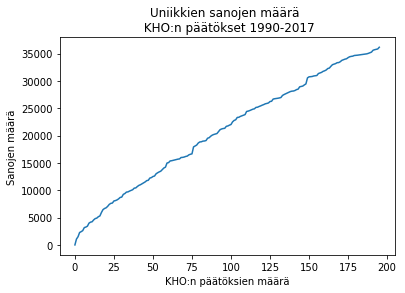

In [53]:
plt.plot(range(len(totals)), totals)
plt.title("Uniikkien sanojen määrä \n KHO:n päätökset 1990-2017")
plt.xlabel("KHO:n päätöksien määrä")
plt.ylabel("Sanojen määrä")

In [35]:
len(total_vocabulary)

1076